<h1><center>NYC CitiBikes</center></h1>

### Data Set Overview:

This Notebook analyzes the New York City Metropolitan bike share porgram CitiBike. CitiBike is a privately owned public bicycle sharing system that serves the New York City boroughs and parts of Northern New Jersey. The system officially launched in May of 2013 with 332 stations and now has over 750 stations. For more on the origins of CitiBike, visit the CititBike [wikipedia page](https://en.wikipedia.org/wiki/Citi_Bike).

The CitiBike dataset loaded into this Jupyter Notebook contains a subset of the overall CitiBike data. Within this dataset are descriptive variables such as tripduration, starttime, stoptime, and station id to name a few. This analysis will provide an overall understanding of this dataset through Exploratory Data Analysis in the first portion of this Notebook, and then move on to analytic questions.

The order of this Notebook will be the following:

Section 1: Staging Environment

Section 2: Exploratory Data Analysis

Section 3: Analytic Questions

  1) [Exploratory Data Analysis](#section1)<a href = '#section1'></a>
    
  2) [Station Geography](#section2)<a href = '#section2'></a>

  3) [Station Temporal Descriptive Statistics](#section3)<a href = '#section3'></a>
       
Section 4: Future Research Proposal

__________________________________________________________________________________________________________________

##### Staging Environment

In [1]:
#import necessary packages...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#import data...
CitiBike = pd.read_csv('JC-201909-citibike-tripdata.csv.zip')

__________________________________________________________________________________________________________________

<a id='section1'></a>
##### Exploratory Data Analysis

In [3]:
CitiBike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,145,2019-09-01 00:00:37.6920,2019-09-01 00:03:03.0100,3640,Journal Square,40.733670,-74.062500,3206,Hilltop,40.731169,-74.057574,29303,Subscriber,1991,1
1,212,2019-09-01 00:03:00.6000,2019-09-01 00:06:33.3420,3194,McGinley Square,40.725340,-74.067622,3679,Bergen Ave,40.722104,-74.071455,29297,Subscriber,1993,2
2,569,2019-09-01 00:07:13.0020,2019-09-01 00:16:42.8610,3214,Essex Light Rail,40.712774,-74.036486,3184,Paulus Hook,40.714145,-74.033552,29435,Customer,1977,1
3,1380,2019-09-01 00:07:25.3350,2019-09-01 00:30:26.1640,3214,Essex Light Rail,40.712774,-74.036486,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,29509,Subscriber,1965,1
4,1346,2019-09-01 00:07:56.4670,2019-09-01 00:30:22.5440,3214,Essex Light Rail,40.712774,-74.036486,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,29226,Subscriber,1968,2


In [4]:
CitiBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49244 entries, 0 to 49243
Data columns (total 15 columns):
tripduration               49244 non-null int64
starttime                  49244 non-null object
stoptime                   49244 non-null object
start station id           49244 non-null int64
start station name         49244 non-null object
start station latitude     49244 non-null float64
start station longitude    49244 non-null float64
end station id             49244 non-null int64
end station name           49244 non-null object
end station latitude       49244 non-null float64
end station longitude      49244 non-null float64
bikeid                     49244 non-null int64
usertype                   49244 non-null object
birth year                 49244 non-null int64
gender                     49244 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 5.6+ MB


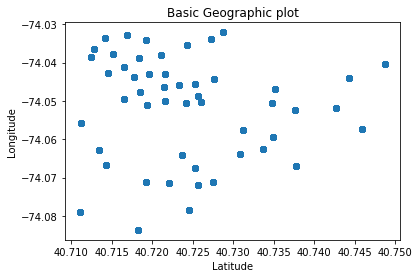

In [62]:
fig, ax = plt.subplots()
ax.plot(CitiBike['start station latitude'], CitiBike['start station longitude'], 'o')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Basic Geographic plot')
plt.show()

This visualization utilizes the 'end station latitude' and 'end station longitude' to plot the NYC CitiBike doc locations. I particularly like that this map allows you to visualize parts of Manhattan, New Jersey, and Brooklyn. This visualization is also useful for giving you an idea as to the denser locations for the CitiBike docs.

EDA Overview:

A few interesting things to note with this dataset:
* There is a few distinctions given as to the user demographics:
    * We can see if a user is a subscriber or a customer
    * We can see what year a user is born
    * We can note the difference in gender
* There is useful information given concerning geography:
    * We can observe slightly the distinction of lower Manhattan, and then North Jersey and the Brookly and Queens boroughs
    * The station start/stop has a geograhpic coordinate associated with it
* There is a lot of information pertaining to particular stations:
    * We can see how many rides start/stop at a given station
    * We can see what time rides start/stop at a given station
    * We can see how long a trip typically lasts when starting from a given station
    
These are a few interesting questions that immediately come to mind when initially exploring this dataset. These will be the questions that I will explore in the following analytic sections.


__________________________________________________________________________________________________________________

##### User Demographics

There are 49,244 observations in this dataset. Unfortunately, the only "id" typed to each observation is a "bike id" and not a "user id". However, we can still explore some interesting demographic questions. This section will explore a few of those questions.

Question 1: What is the average age of a user?

In [16]:
print("The average birth year is", np.mean(CitiBike['birth year']))

The average birth year is 1981.5974331898303


The average birth year is 1981, putting that average user at age 38.

Question 2: What are the user age extremes?

In [18]:
print("The oldest user was born in", np.min(CitiBike['birth year']))

The oldest user was born in 1888


In [19]:
print("The youngest user was born in", np.max(CitiBike['birth year']))

The youngest user was born in 2003


According to this data there is a user out there who is 123.... which seems highly suspect that such a user would be biking around New York City. The minimum age of 16 is much more believable, although I think I have seen users younger than 16 on CitiBike.

Question 3: Are there more subscribers or customers?

In [9]:
CitiBike['usertype'].value_counts()

Subscriber    41856
Customer       7388
Name: usertype, dtype: int64

Looks like there are more users who are subscribers than customers. From the CitiBike website we are told a Customer is a 24 hour pass or 3 day pass user and subscriber is a user that purchases a yearly pass. The subscriber option is much more cost effective, so this distinction in user activities does not surprise me.

Question 4: Which gender is more prevalent?

In [10]:
CitiBike['gender'].value_counts()

1    33417
2    12049
0     3778
Name: gender, dtype: int64

From the CitiBike website we are told that Gender=1 is male and Gender=2 is female. Looks as if there are substantially more males than females that are taking CitiBike.

_________________________________________________________________________________________________________________

<a id='section2'></a>
##### Station Geography

From the initial plotting of the start station latitude and start station longitude it appears as though these locations are in Manhattan and New Jersey. Lets double check that by plotting the stations onto an interactive map. We can also see which stations are more busy by setting the colors of the stations to reflect overall use.

In [20]:
#import geo package...
import folium

In [21]:
#create a map based utilizing the CitiBike data and set indicators on map to reflect usage...
location=CitiBike.groupby(['start station latitude','start station longitude','start station name']).size().reset_index(name='count').sort_values(by='count',ascending=False)
location=location[location['count']>5]
location['color']=location['count'].apply(lambda count:"Black" if count>=4000 else
                                         "green" if count>=2000 and count<4000 else
                                         "Orange" if count>=1000 and count<2000 else
                                         "darkblue" if count>=500 and count<1000 else
                                         "red" if count>=300 and count<500 else
                                         "lightblue" if count>=250 and count<300 else
                                         "brown" if count>=1 and count<250 else
                                         "grey")
location['size']=location['count'].apply(lambda count:20 if count>=4000 else
                                         15 if count>=2000 and count<4000 else
                                         8 if count>=500 and count<1000 else
                                         5 if count>=300 and count<500 else
                                         3 if count>=250 and count<300 else
                                         2 if count>=1 and count<250 else
                                         0.1)

In [11]:
#instantiate map...
m = folium.Map(location=[40.75, -74], zoom_start=10)
for lat,lon,area,color,count,size in zip(location['start station latitude'],location['start station longitude'],location['start station name'],location['color'],location['count'],location['size']):
     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=size,
                            color='b',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(m)
m.save('NYC_CitiBike_map.html')

Opening the html map, we see that this is actually data reflecting stations in New Jersey. We can also see through making the station markers reflect the overall count of observations which stations are the busiest, with the Grove St PATH clearly showing to be the busiest station.

_________________________________________________________________________________________________________________

<a id='section3'></a>
##### Station Temporal Descriptive Statistics

Now that we know which stations are busiest and where those stations are on a map, a curious question we can also answer is what times are the busiest for those busy stations. Specifically, we should investigate what time those busy stations are having their bikes checked out most. This will be useful information for us as it will help us know when a station is either getting too full or having too many bikes checked out. This will be useful from a station management persepctive as many times there are either no bikes left at a station or there are too many bikes checked in and no spots left to dock your bike.

Lets focus on the busiest station in the dataset, the Grove St PATH station.

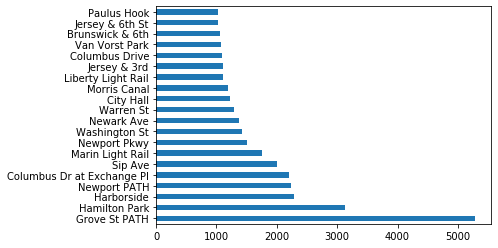

In [64]:
#lets look at all of the station activity to check and ensure we know which one us busiest...
CitiBike['start station name'].value_counts()[:20].plot(kind='barh')

As We can see, Grove St PATH is clearly the busiest station. Lets focus on that one.

In [45]:
#first, change the 'starttime' column into a datetime date time value...
CitiBike['starttime'] = pd.to_datetime(CitiBike['starttime'])

In [46]:
#set the starttime column as the index of the dataframe...
CitiBike = CitiBike.set_index('starttime')

In [47]:
CitiBike.head()

,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,
2019-09-01 00:00:37.692,145,2019-09-01 00:03:03.0100,3640,Journal Square,40.733670,-74.062500,3206,Hilltop,40.731169,-74.057574,29303,Subscriber,1991,1
2019-09-01 00:03:00.600,212,2019-09-01 00:06:33.3420,3194,McGinley Square,40.725340,-74.067622,3679,Bergen Ave,40.722104,-74.071455,29297,Subscriber,1993,2
2019-09-01 00:07:13.002,569,2019-09-01 00:16:42.8610,3214,Essex Light Rail,40.712774,-74.036486,3184,Paulus Hook,40.714145,-74.033552,29435,Customer,1977,1
2019-09-01 00:07:25.335,1380,2019-09-01 00:30:26.1640,3214,Essex Light Rail,40.712774,-74.036486,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,29509,Subscriber,1965,1
2019-09-01 00:07:56.467,1346,2019-09-01 00:30:22.5440,3214,Essex Light Rail,40.712774,-74.036486,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,29226,Subscriber,1968,2


In [60]:
_new = CitiBike.resample('H').sum()

In [61]:
_new.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
starttime,,,,,,,,,,
2019-09-01 00:00:00,14140,56464,692.244911,-1258.708810,56575,692.275498,-1258.792637,490895,33700,18
2019-09-01 01:00:00,181831,35694,447.932876,-814.433775,36799,447.992895,-814.445509,318447,21765,10
2019-09-01 02:00:00,29499,39057,488.687019,-888.522520,40731,488.667624,-888.525377,338291,23797,12
2019-09-01 03:00:00,1872,16503,203.625747,-370.252577,16665,203.638422,-370.281948,144363,9899,5
2019-09-01 04:00:00,757,13285,162.913192,-296.265808,13750,162.910602,-296.255723,111211,7956,5


In [55]:
#only look at one day...
Day = _new['2019-09-01':'2019-09-01']

In [56]:
Day

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
starttime,,,,,,,,,,
2019-09-01 00:00:00,14140,56464,692.244911,-1258.708810,56575,692.275498,-1258.792637,490895,33700,18
2019-09-01 01:00:00,181831,35694,447.932876,-814.433775,36799,447.992895,-814.445509,318447,21765,10
2019-09-01 02:00:00,29499,39057,488.687019,-888.522520,40731,488.667624,-888.525377,338291,23797,12
2019-09-01 03:00:00,1872,16503,203.625747,-370.252577,16665,203.638422,-370.281948,144363,9899,5
2019-09-01 04:00:00,757,13285,162.913192,-296.265808,13750,162.910602,-296.255723,111211,7956,5
2019-09-01 05:00:00,439,3640,40.733670,-74.062500,3677,40.727551,-74.071061,29207,1971,1
2019-09-01 06:00:00,5360,26022,325.791446,-592.460576,26496,325.770919,-592.426663,229589,15814,8
2019-09-01 07:00:00,11853,75309,936.548037,-1703.083472,75185,936.596225,-1703.070518,655382,45471,25
2019-09-01 08:00:00,23368,122671,1506.753377,-2739.765278,122011,1506.753236,-2739.640440,1062044,73279,40
